In [3]:
import feuturization
import clustering
import evaluation

from classes.pink import Pink
from classes.pinkMST import PinkMST
from classes.point import Point
from classes.edge import Edge
from classes.dataSplitter import DataSplitter
from classes.unionFind import UnionFind

import time
import logging
import math
import os
import sys
import time

from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import udf
from pyspark.sql import SparkSession
from pyspark.sql.types import ArrayType, StructType, StructField, IntegerType, DoubleType, NullType, LongType, StringType

### Initializations

In [4]:
k = 4
num_data_splits = 4
num_points = 200
num_dimensions = 4
dataset_name = "data"
spark_config_file = None

PROJECT_HOME = os.getcwd()


#numSubGraphs is the total number of subgraph inclding the combinations of bipartite graphs
num_subgraphs = int(num_data_splits * (num_data_splits - 1) / 2 + num_data_splits)

EXPERIMENT_HOME = PROJECT_HOME + "/data/" +dataset_name + "_d" + str(num_dimensions) + "_s" + str(num_data_splits)
os.makedirs(EXPERIMENT_HOME, exist_ok=True)

# number of subgraphs
id_partitions_file_location = EXPERIMENT_HOME + "/subgraphIds"

data_partitions_file_location = EXPERIMENT_HOME + "/dataPartitions"

binary_file_location = PROJECT_HOME + "/data/" + dataset_name + ".bin"



### Featurization

In [5]:
feuturization.prepare_data(binary_file_location, num_data_splits, data_partitions_file_location, spark_config_file, id_partitions_file_location, num_subgraphs, num_points, num_dimensions)

================calling create_partition_files from DataSplitter==================
numPartions : 10
create idSubgraph files: /home/jovyan/work/PinkMST/PinkMST/data/data_d4_s4/subgraphIds
idPartitions succefully written
================ create_partition_files completed ==================
================calling write_parquet_files from DataSplitter==================
point_size_in_bytes : 32
data dimensions: 200,4
=====:  0: [1.0, 19.0, 15.0, 39.0]
=====:  1: [1.0, 21.0, 15.0, 81.0]
=====:  2: [0.0, 20.0, 16.0, 6.0]
=====:  3: [0.0, 23.0, 16.0, 77.0]
=====:  4: [0.0, 31.0, 17.0, 40.0]
=====:  5: [0.0, 22.0, 17.0, 76.0]
parquet files succefully written
================ write_parquet_files completed ==================


### Clustering

In [6]:
MST = clustering.pink_MST(id_partitions_file_location, data_partitions_file_location, num_subgraphs, num_data_splits, num_points, k)

execution_time : 7925 milliseconds


/home/jovyan/work/PinkMST/PinkMST/clustering.py:66: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dense_matrix, method=method)


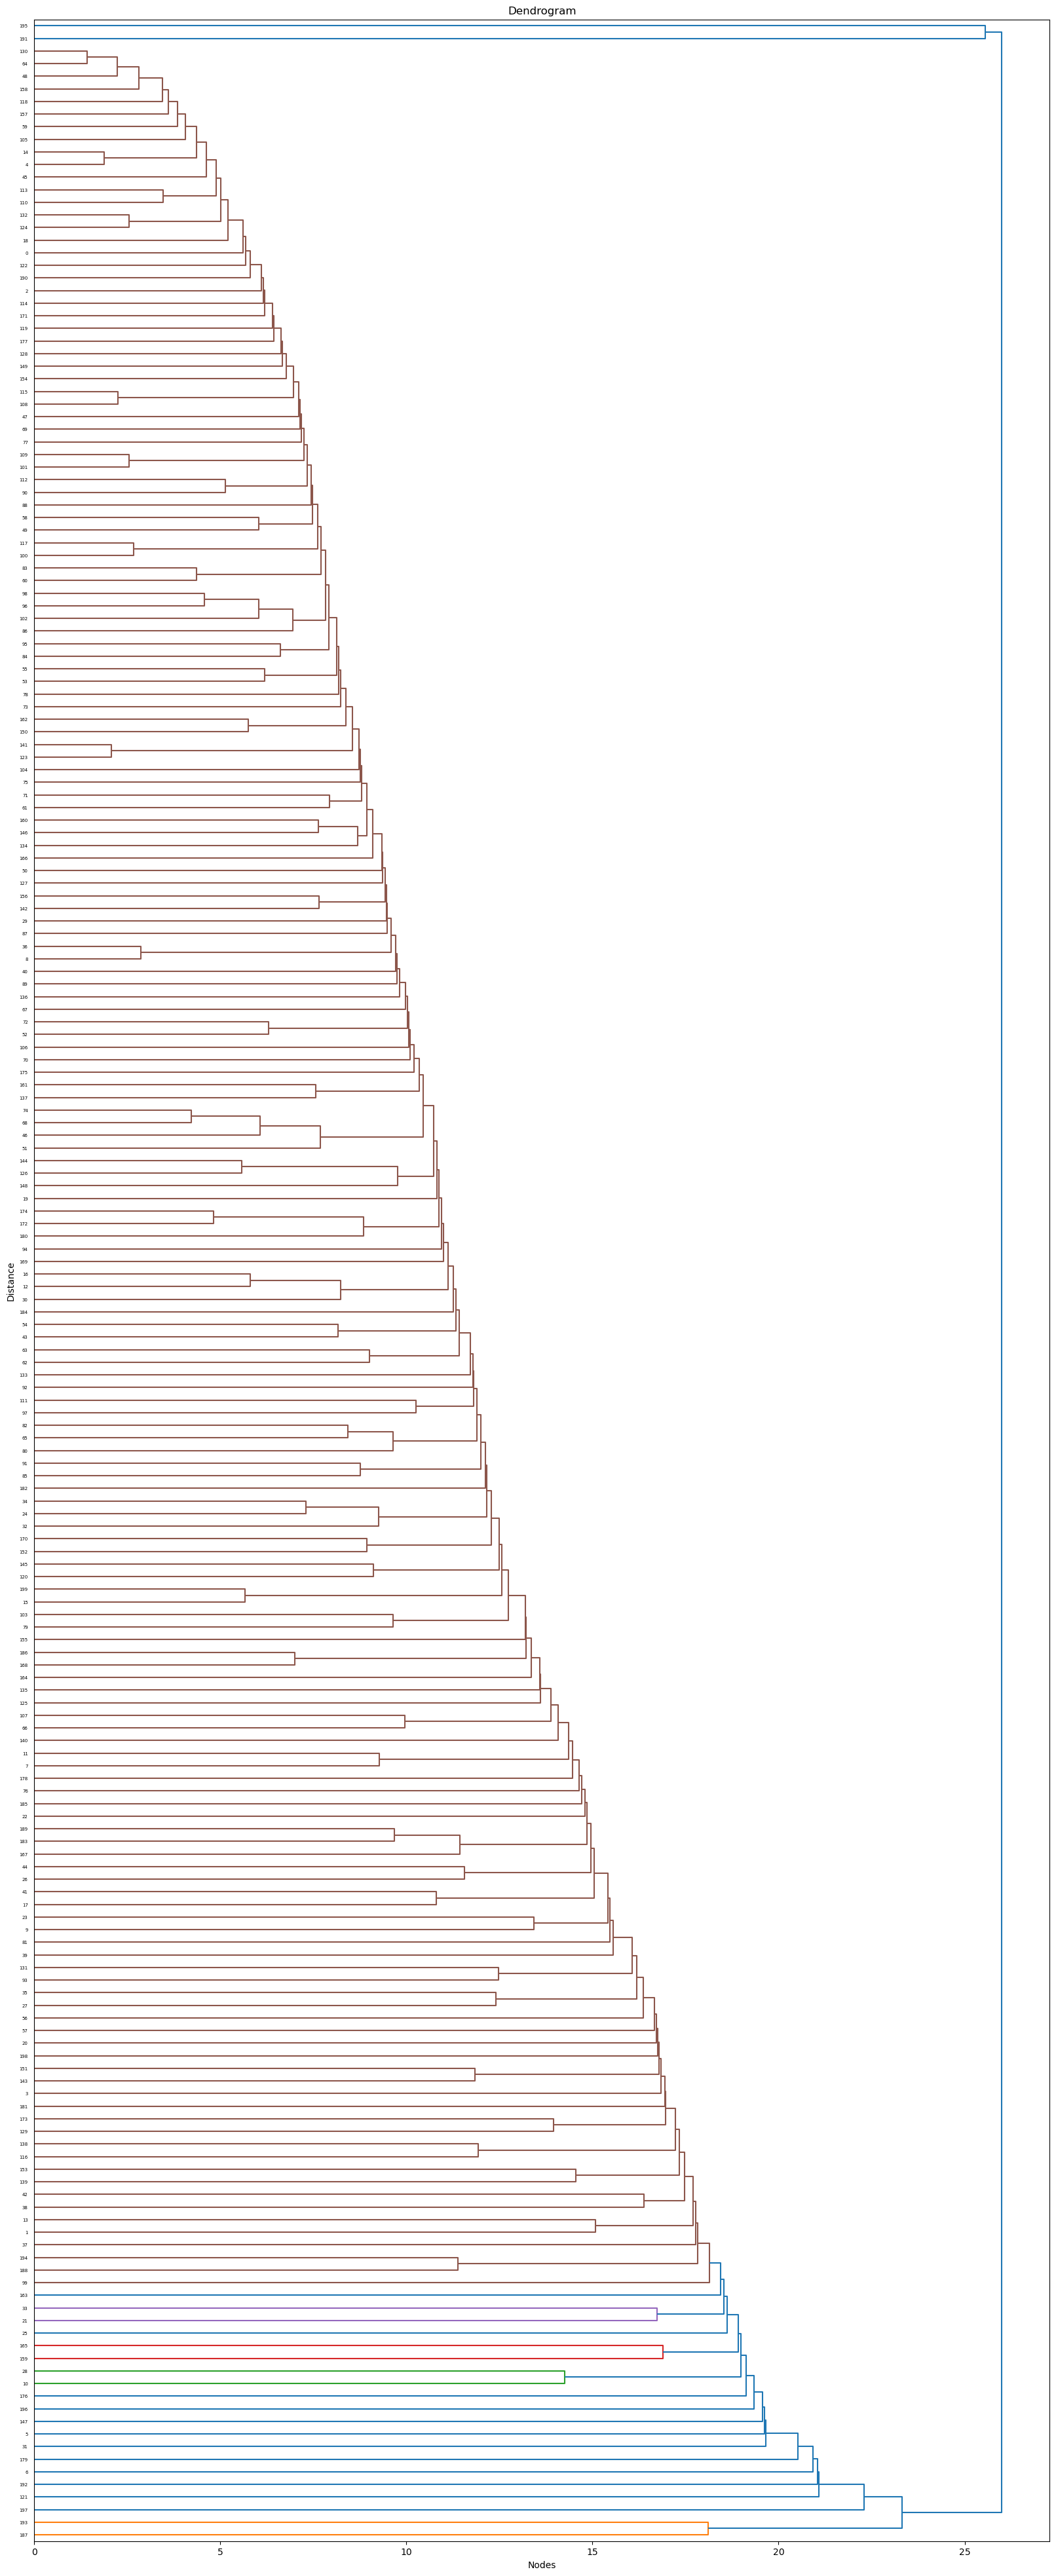

In [7]:
clustering.plot_dendrogram(MST, "average", "right")

### Evaluation

In [9]:
#silhouette_metric_score(mst_edges,linkage, distance_threshold, n_clusters ):
evaluation.silhouette_metric_score(MST, linkage = "single", distance_threshold = None, n_clusters= 3 )

The silhouette score is: 0.44168945082860295
